# Terrain multiplier values from surface roughness

The local variation of wind speed across the landscape is affected by the aerodynamic roughness of the surface upwind of the site, the local topography and the shielding afforded by upwind structures. For the purposes of the Australian/New Zealand Standard *AS/NZS 1170.2 -- Structural design actions Part 2: wind actions*, the effects of surface roughness are encapsulated in the terrain/height multiplier $M_{z,cat}$. AS/NZS 1170.2:2011 defines four terrain categories that give a broad description of the cover::

1. *Category 1* -- Exposed open terrain with few or no obstructions and water surfaces at servicability wind speeds.
2. *Category 2* -- Water surfaces, open terrain, grassland with few, well scattered obstructions having heights generally from 1.5 to 10 m.
3. *Category 3* -- Terrain with numerous closely spaced obstructions 3 m to 5 m high, such as areas of suburban housing. 
4. *Category 4* -- Terrain with numerous large, high (10 m to 30 m high) and closely spaced obstructions, such as larfe city centres and well-developed industrial complexes.

The Standard provides a table of $M_{z,cat}$ values for fully developed [boundary layer] profiles and indicates that for intermediate values of height and terrain category, linear interpolation can be used. 

| Height (z)          | Terrain category 1 | Terrain category 2 | Terrain category 3 | Terrain category 4 |
| ------------------- | ------------------ | ------------------ | ------------------ | ------------------ |
| $\le$ 3             | 0.99               | 0.91               | 0.83               | 0.75               |
| 5                   | 1.05               | 0.91               | 0.83               | 0.75               |
| 10                  | 1.12               | 1.00               | 0.83               | 0.75               |
| 15                  | 1.16               | 1.05               | 0.89               | 0.75               |
| 20                  | 1.19               | 1.08               | 0.94               | 0.75               |
| 30                  | 1.22               | 1.12               | 1.00               | 0.80               |
| 40                  | 1.24               | 1.16               | 1.04               | 0.85               |
| 50                  | 1.25               | 1.18               | 1.07               | 0.90               |
| 75                  | 1.27               | 1.22               | 1.12               | 0.98               |
| 100                 | 1.29               | 1.24               | 1.16               | 1.03               |
| 150                 | 1.31               | 1.27               | 1.21               | 1.11               |
| 200                 | 1.32               | 1.29               | 1.24               | 1.16               |

Terrain/height multiplier for gust wind speeds in fully developed terrrains -- Serviceability Limit State design -- all regions and Ultimate Limit State -- Regions A1 to A7, W and B.

|    Height (z)      | Terrain categories 1 and 2 | Terrain categories 3 and 4 |
| :----------------: | :------------------------: | :------------------------: |
|      $\le$ 3       |            0.90            |            0.80            |
|         5          |            0.95            |            0.80            |
|         10         |            1.00            |            0.89            |
|         15         |            1.07            |            0.95            |
|         20         |            1.13            |            1.05            |
|         30         |            1.20            |            1.15            |
|         40         |            1.25            |            1.25            |
|         50         |            1.29            |            1.29            |
|         75         |            1.35            |            1.35            |
|      $\ge$ 100     |            1.40            |            1.40            |
Terrain/height multiplier for gust wind speeds in fully developed terrains -- Ultimate Limit State Design -- Regions C and D only.

Table 4.2(B) in AS 1170.2:2011 provides indicative roughness lengths for the four terrain categories:

| Terrain category | Roughness length (m) |
| :--------------: | :------------------: |
|        1         |        0.002         |
|        2         |         0.02         |
|        3         |         0.2          |
|        4         |         2.0          |


Additional detail is provided in AS/NZS 1171.2 Supplement 1, which defines roughness lengths for some typical terrain classes. The Supplement also defines a relationship between the roughness length and the terrain category:

$z_0 = 2 \times 10^{terrain\_category - 4}$



|                 Terrain class                 |  Terrain roughness length ($z_0$, m)   | Terrain category |
| :-------------------------------------------: | :------------------------------------: | :--------------: |
|                City buildings                 |                   2                    |       4.00       |
|                    Forest                     |                   1                    |       3.70       |
|      High density (industrial) buildings      |                  0.8                   |       3.60       |
|              Small town centres               |                  0.4                   |       3.30       |
|            Suburban/wooded country            |                  0.2                   |       3.00       |
|             Orchard, open forest              |                  0.08                  |       2.60       |
|           Long grass with few trees           |                  0.06                  |       2.48       |
|                     Crops                     |                  0.04                  |       2.30       |
| Open rough water, airfields, uncut grass, etc |                  0.02                  |       2.00       |
|                   Cut grass                   |                 0.008                  |       1.60       |
|            Desert (stones), roads             |                 0.006                  |       1.48       |
|    Mudflats/salt evaporators/sandy beaches    |                 0.004                  |       1.30       |
|                 Snow surface                  |                 0.002                  |       1.00       |


Armed with this, we aim to develop a relationship between roughness length and the $Mz,cat$ values for the different regions. 

In [1]:
%matplotlib inline

import numpy as np
from scipy import optimize, interpolate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context("poster")
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

Let us begin with the relationship between terrain category and roughness length. It's a simple log-linear relationship, so should be easy to link the two.

c:\python27\lib\site-packages\seaborn\linearmodels.py:267: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


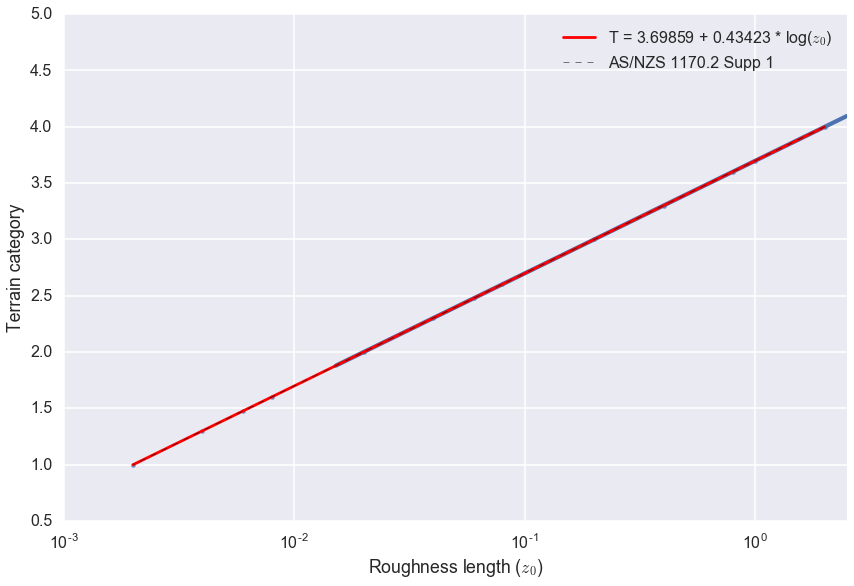

In [2]:
z0 = np.array([2., 1., 0.8, 0.4, 0.2, 0.08, 0.06, 0.04, 0.02, 0.008, 0.006, 0.004, 0.002])
cat = np.array([4., 3.7, 3.6, 3.3, 3.0, 2.6, 2.48, 2.30, 2.0, 1.6, 1.48, 1.30, 1.0])


def func(z0, a, b):
    return a + b * np.log(z0)

ax = sns.regplot(z0, cat, fit_reg=True, logx=True)
zopt, zcov = optimize.curve_fit(func, z0, cat)
label = "T = {0:.5f} + {1:.5f} * log($z_0$)".format(*zopt)
plt.plot(z0, func(z0, *zopt), 'r-', label=label)

plt.plot(z0, np.log10(z0/2.)+4., 'k--', lw=0.5, label="AS/NZS 1170.2 Supp 1")

ax.set_xlim(0.001, 2.5)
ax.set_ylim(0.5, 5)
ax.set_xscale("log")
ax.set_xlabel("Roughness length ($z_0$)")
ax.set_ylabel("Terrain category")
ax.legend()


Now we have a function that relates roughness length to terrain category. It's log-linear in $z_0$, and (helpfully) matches that published in the Supplement to AS/NZS 1170.2:2011. The only difference between the one derived here and that in the Supplement is that I've taken the natural logarithm of $z_0$, the Supplement takes the base-10 logarithm.

Next, we need to build a relationship between the terrain categories and the terrain multiplier value $M_{z,cat}$. We'll start with the easier (and probably more common) case of the Serviceability Limit State conditions.

Since there are many different heights to select from, I start by creating a dict of the values, with keys as heights and values an array of the corresponding $M_{z,cat}$ values for the four terrain categories.

In [3]:
mz_val = {3: np.array([0.99, 0.91, 0.83, 0.75]),
          5: np.array([1.05, 0.91, 0.83, 0.75]), 
          10: np.array([1.12, 1.00, 0.83, 0.75]), 
          15: np.array([1.16, 1.05, 0.89, 0.75]), 
          20: np.array([1.19, 1.08, 0.94, 0.75]), 
          30: np.array([1.22, 1.12, 1.00, 0.80]), 
          40: np.array([1.24, 1.16, 1.04, 0.85]), 
          50: np.array([1.25, 1.18, 1.07, 0.90]), 
          75: np.array([1.27, 1.22, 1.12, 0.98]), 
          100: np.array([1.29, 1.24, 1.16, 1.03]), 
          150: np.array([1.31, 1.27, 1.21, 1.11]), 
          200: np.array([1.32, 1.29, 1.24, 1.16])}

mz_cat = np.array([1., 2., 3., 4.])

Now generate a plot of these, fitted against terrain category. 

First step is to create a suitable colormap so we can separate the plots.

In [4]:
cmap = sns.husl_palette(12)

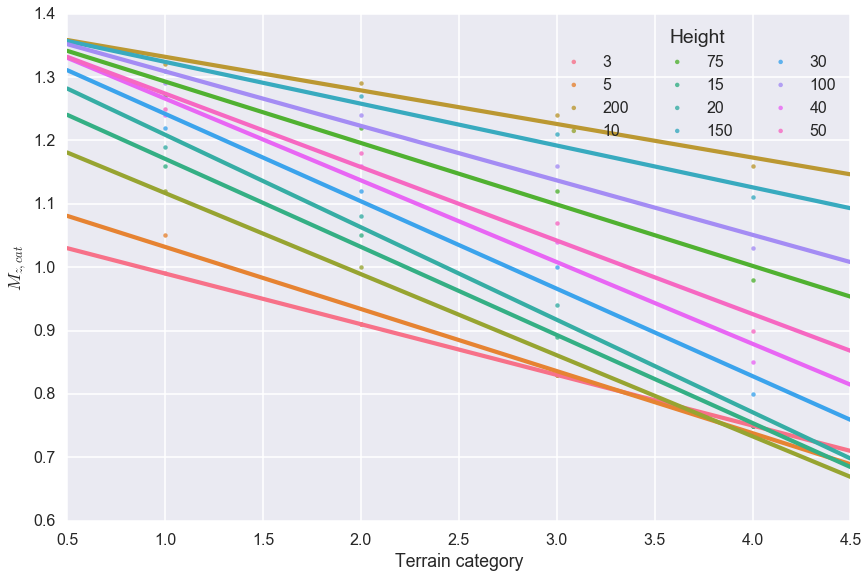

In [5]:
fig, ax = plt.subplots(1, 1)
n = 0
for key, val in mz_val.iteritems():
    sns.regplot(mz_cat, val, label="{0}".format(key), ax=ax, color=cmap[n], ci=None)
    n += 1
    
ax.set_xlabel("Terrain category")
ax.set_ylabel(r"$M_{z,cat}$")
ax.legend(title="Height", ncol=3)

This isn't the easiest plot to interpret. The lines are overlapping, and the regressions are not exact. Anyway, we'll make this easier to read at a later point by making the plots interactive.

The next step is to link the fitted functions for $M_{z,cat}$ to the roughness length $z_0$. We need to map a roughness length to terrain category, then from that to $M_{z,cat}$. 

Start by calculating a fit of terrain category to $M_{z,cat}$:

In [31]:
def fit_mzcat(category, a, b):
    return a + b *np.log(category)


def plotmzcat(height, mz_vals):
    
    plt.clf()
    mzvals = mz_vals[height]
    ax = sns.regplot(mz_cat, mzvals, fit_reg=True, logx=True)
    
    popt, pcov = optimize.curve_fit(fit_mzcat, mz_cat, mzvals)
    label = r"$M_z$ = {0:.5f} + {1:.5f} * log(T)".format(*popt)
    plt.plot(mz_cat, fit_mzcat(mz_cat, *popt), 'r-', label=label)
    ax.set_ylabel("$M_{z,cat}$")
    ax.set_xlabel("Terrain category")
    ax.legend()
    plt.show()
    
    
heights = sorted(mz_val.keys())
heightSelect = widgets.Dropdown(options=heights, value=heights[0], description="Height (m)")

w = interact(plotmzcat, height=heightSelect, mz_vals=fixed(mz_val)) 
display(w)

<function __main__.plotmzcat>

We'll apply the previously determined function for terrain category as a function of $z_0$ to the array of terrain category values and then put that into the mix as the input `mz_cat` variable for `plotmzcat()`.

Remember that $z_0$ was defined previously, along with the (helpfully-named!) `func` function. We use this to define a new array of terrain categories.


In [7]:
extended_z0 = np.array([10., 8., 4., 2., 1., 0.8, 0.4, 0.2, 0.08, 0.06, 0.04, 0.02, 0.008, 0.006, 0.004, 0.002])
new_mz_cat = func(extended_z0, *zopt)

Define a function to interpolate the new terrain category values to the $M_{z,cat}$ values for the selected height.


In [8]:
def interp_mzcategory(mzvals, mz_cat, height, new_mz_cat):
    f = interpolate.interp1d(mzvals, mz_cat, )
    return f(new_mz_cat)

Now we create an interactive plot, where the full range of roughness lengths $z_0$ are used as the input, and the output is the terrain multiplier value $M_{z,cat}$ for the indicative height of buildings. 

The relationship between terrain category and $z_0$ is the same irrespective of the heights, so the only change is for different $M_{z,cat}$ values for different terrain categories.

The functional form is given in the legend entry. 

In [32]:
def plotmzcat_zo(height, mz_vals):
    
    plt.clf()
    mzvals = mz_vals[height]
    popt, pcov = optimize.curve_fit(fit_mzcat, mz_cat, mzvals)
    fix, ax = plt.subplots(1, 1)
    label1 = r"{0:.5f} + {1:.5f} * log($z_0$)".format(*zopt)
    label = r"$M_z$ = {0:.5f} + {1:.5f} * log({2})".format(popt[0], popt[1], label1)
    plt.semilogx(extended_z0, fit_mzcat(new_mz_cat, *popt), 'r-', label=label)
    ax.set_ylabel("$M_{z,cat}$")
    ax.set_xlabel("Roughness length ($z_0$)")
    ax.legend()
    plt.show()
    
    
heights = sorted(mz_val.keys())
heightSelect = widgets.Dropdown(options=heights, value=heights[0], description="Height (m)")

w = interact(plotmzcat_zo, height=heightSelect, mz_vals=fixed(mz_val)) 
display(w)

<function __main__.plotmzcat_zo>

For completeness, we write the values to a formatted table so it's easier to read off the values.

In [11]:
def tableprint(height, mz_vals):
    titlestr = "Roughness length (m) | Terrain category | Mz,cat"
    rowfmt = "{0: ^21}|{1:18.5f}|{2:7.4f}"
    mzvals = mz_vals[height]
    popt, pcov = optimize.curve_fit(fit_mzcat, mz_cat, mzvals)
    mzs = fit_mzcat(new_mz_cat, *popt)
    
    print(titlestr)
    for z, cat, mz in zip (extended_z0, new_mz_cat, mzs):
        print(rowfmt.format(z, cat, mz))

In [33]:
heights = sorted(mz_val.keys())
heightSelector = widgets.Dropdown(options=heights, value=heights[0], description="Height (m)")
ww = interact(tableprint, height=heightSelector, mz_vals=fixed(mz_val)) 
display(ww)

<function __main__.tableprint>

## Mz,cat for ultimate state design



In [15]:
mz_val_us = {3: np.array([0.90, 0.90, 0.80, 0.80]),
          5: np.array([0.95, 0.95, 0.80, 0.80]), 
          10: np.array([1.00, 1.00, 0.89, 0.89]), 
          15: np.array([1.07, 1.07, 0.859, 0.95]), 
          20: np.array([1.13, 1.13, 1.05, 1.05]), 
          30: np.array([1.20, 1.20, 1.15, 1.15]), 
          40: np.array([1.25, 1.25, 1.25, 1.25]), 
          50: np.array([1.29, 1.29, 1.29, 1.29]), 
          75: np.array([1.35, 1.35, 1.35, 1.36]), 
          100: np.array([1.40, 1.40, 1.40, 1.40]), 
          150: np.array([1.40, 1.40, 1.40, 1.40]), 
          200: np.array([1.40, 1.40, 1.40, 1.40])}

mz_cat = np.array([1., 2., 3., 4.])

In [34]:
w = interact(plotmzcatus, height=heightSelect, mz_vals=fixed(mz_val_us)) 
display(w)

<function __main__.plotmzcatus>

In [35]:
heights = sorted(mz_val_us.keys())
heightSelect = widgets.Dropdown(options=heights, value=heights[0], description="Height (m)")

w = interact(plotmzcat_zo, height=heightSelect, mz_vals=fixed(mz_val_us)) 
display(w)

<function __main__.plotmzcat_zo>

In [36]:
heights = sorted(mz_val_us.keys())
heightSelector = widgets.Dropdown(options=heights, value=heights[0], description="Height (m)")
ww = interact(tableprint, height=heightSelector, mz_vals=fixed(mz_val_us)) 
display(ww)

<function __main__.tableprint>